# Machine Learning
step awal tool yang kita bisa bikin untuk mendekati AI, membuat program tanpa melakukan coding baris per baris.

## Terminologi
- Dataset: data yang kita gunakan untuk melatih model machine learning
- Algoritma: set instruksi untuk menjelaskan cara belajar dataset nya seperti apa
- Model: algoritma + dataset yang sudah dilatih
- Features: bagian dari dataset yang digunakan Model untuk berlatih.

contohnya, kalau kita punya dataset hasil tes darah 10rb orang. Datanya tabular, ada no. ktp, ada umur, ada hasil cholesterol, ada gender, .... kita bisa buat model khusus untuk memprediksi apakah seseorang punya cholesterol tinggi/tidak dari umur dan gender nya. maka fitur yang kita gunakan adalah umur dan gender. target adalah tinggi/tidak cholesterolnya

## Algoritma Machine Learning
ada banyak jenis algoritma machine learning, masing-masing dibuat dengan tujuan tertentu, dan memiliki pros and cons.

algoritma A cocok dengan dataset tipe A, misalnya. algoritma B cocok untuk dataset tipe B membuat model tipe B, misalnya.

tergantung 1) tipe data 2) model yang mau dibuat maka 3) kita pilih algoritma yang paling cocok

## Process
1. Kumpulkan data. Untuk kelas ini kita akan gunakan data yang sudah ready dari kaggle.com atau website lainnya. Di riil step ini bisa memakan banyak waktu dan resource, survey2, lama dan mahal.
2. Rapikan data. Step ini yang paling lama setelah data disiapkan. kita perlu rapikan, buat jadi tabular, buat jadi numerik, data yang salah isi, kosong2 kita bersihin dulu. Missing data imputation, invalid data (remove), mengurangi cardinality, normalization, scaling, add/remove columns, dll
3. Training model. pilih algoritma ML yang sesuai dan latih dengan dataset yang sudah disiapkan.
4. Evaluasi model. Model kita bagus/ tidak? akurat? kapan akurat kapan tidak?
5. Tuning. Coba ubah ubah parameter training model untuk membuat hasil model lebih akurat. kita bisa juga balik ke step 1-3 untuk mencoba membuat model yang lebih baik.

## Supervised vs Unsupervised
Supervised: punya target, model digunakan untuk prediksi.

Unsupervised: tidak punya target, model digunakan untuk merapikan data, manipulasi data.


Untuk model tipe Supervised, dia terbagi ke 2 main category: Regression dan Classification

## Regression
target model ML kita menebak/ memprediksi data yang bersifat continuous

contoh: model ML yang memprediksi harga rumah di Jakarta. kita berikan data hasil penjualan rumah di Jakarta 10 tahun terakhir. kita pilih algoritma ML tipe Supervised, Regression, Linear Regression. latih model. model memprediksi harga rumah.

## Classification
target model ML kita memprediksi data yang bersifat discrete
/ kategorikal

contoh: model ML yang memprediksi rumah ini tipe murah/ mewah. model memprediksi salah satu dari 2 jenis rumah: murah/ mewah. kita berikan data awal yang punya kolom "jenis rumah" berisi murah/ mewah. kita pilih algoritma ML tipe Supervised, Classification, Naive Bayes. latih model. model memprediksi tipe rumah.


# Regression Models
jenis algoritma regression model termasuk:
- Linear Regression
- Polynomial Regression

## Linear Regression


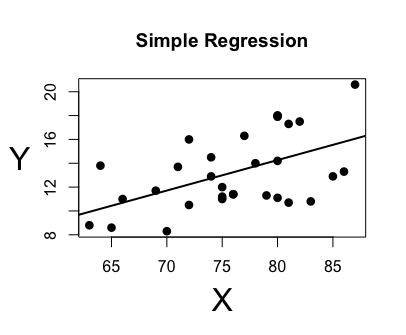

bayangkan di grafik atas, X adalah luas tanah dalam meter persegi. Y adalah harga rumah dalam juta rupiah. Scatter plot yang terlihat, titik titk nya, menunjukkan ada korelasi positif, rumah makin luas, harga makin mahal.

Lebih dari itu, kita bisa temukan formula Linear Regression `Y = aX + b` dimana kita bisa tau berapa harga rumah Y, kalau kita sudah tau berapa luas rumah X.

Contoh, bisa saja `Y = 10X + 2000`, artinya kalau luas rumah 10 meter persegi, maka harga rumah adalah 10*10 + 2000 = 2100 juta rupiah.

Ini yang dimaksud dengan linear regression.

Kita bisa bikin model Linear Regression.

Model Machine Learning yang akan kita buat, bisa mencari pattern Linear Regression ini di dimensi berapapun. Tidak harus 2 dimensi saja, 1 fitur, 1 target.

Contoh, kita bisa tau harga rumah kalau kita sudah tau: luas rumah, luas bangunan, tahun dibangun, harga terakhir terjual, daerah, jenis sertifikat, dll.

In [ ]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # step tambahan untuk membuat Polynomial Regression

untuk contoh kali ini, kita gunakan data historical harga emas, untuk membuat model yang memprediksi harga emas

dataset: https://raw.githubusercontent.com/stefkwan-h8/dataset/main/gold.csv

In [ ]:
# 1. import data
df_gold = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/gold.csv")
df_gold.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,281.0,281.0,281.0,282.7,4,USD
1,2000-01-05,283.2,283.2,283.2,281.1,16,USD
2,2000-01-06,281.4,281.4,281.4,281.4,0,USD
3,2000-01-07,281.9,281.9,281.9,281.9,0,USD
4,2000-01-10,281.7,281.7,281.7,281.7,0,USD


In [ ]:
# 2. siapkan data
# explore data, EDA
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5706 entries, 0 to 5705
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5706 non-null   object 
 1   Open      5706 non-null   float64
 2   High      5706 non-null   float64
 3   Low       5706 non-null   float64
 4   Close     5706 non-null   float64
 5   Volume    5706 non-null   int64  
 6   Currency  5706 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 312.2+ KB


In [ ]:
# benerin tipe data tanggal di kolom Date dari object jadi datetime
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5706 entries, 0 to 5705
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5706 non-null   datetime64[ns]
 1   Open      5706 non-null   float64       
 2   High      5706 non-null   float64       
 3   Low       5706 non-null   float64       
 4   Close     5706 non-null   float64       
 5   Volume    5706 non-null   int64         
 6   Currency  5706 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 312.2+ KB


In [ ]:
# kebetulan tidak ada missing value, jadi tidak kita fillna/ dropna/ missing data imputation

In [ ]:
# di contoh ini, kita gunakan tahun untuk memprediksi harga emas di kolom "Open"
# jadi kita siapkan dataframe 2 kolom, fitur tahun, target "Open"
df_gold["tahun"] = df_gold["Date"].dt.year
df_gold.head()

,Date,Open,High,Low,Close,Volume,Currency,tahun
0,2000-01-04,281.0,281.0,281.0,282.7,4,USD,2000
1,2000-01-05,283.2,283.2,283.2,281.1,16,USD,2000
2,2000-01-06,281.4,281.4,281.4,281.4,0,USD,2000
3,2000-01-07,281.9,281.9,281.9,281.9,0,USD,2000
4,2000-01-10,281.7,281.7,281.7,281.7,0,USD,2000


In [ ]:
df_goldyear = df_gold[["tahun", "Open"]]
df_goldyear = df_goldyear.rename(columns={"Open":"price"})
df_goldyear.head()

,tahun,price
0,2000,281.0
1,2000,283.2
2,2000,281.4
3,2000,281.9
4,2000,281.7


In [ ]:
# 3. buat/ latih model machine learning tipe Linear Regression
model_emas = LinearRegression()

# latih
X = df_goldyear[["tahun"]] # fitur, harus 2 dimensi
Y = df_goldyear['price']   # target, 1 dimensi saja

model_emas.fit(X, Y)

LinearRegression()

model Linear Regression sudah jadi

kalau sudah jadi, kita bisa lakukan step berikut: Evaluasi

jangan lupa juga, model yang sudah kita buat, tipe Supervised, Linear Regression, bisa kita gunakan untuk membuat prediksi.

fitur yang kita gunakan adalah tahun. 1 fitur saja. jadi kita bisa berikan 1 value tahun ke modelnya, dan model bisa menjawab hasil prediksi 'price' nya target kita tadi.

- evaluasi: cek model bagus/ tidak
- inference: pakai modelnya

In [ ]:
# contoh pakai
# misalakan di tahun 2024, harga emas berapa sih?
# X, fitur, harus 2 dimensi. harus numerik juga.
model_emas.predict([[2024]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2026.57948893])

model ini memprediksi di tahun 2024, harga emas ada di 2026.6 USD

optional visualisasi: saat hanya ada 1 fitur saja, kita bisa visualisasikan Linear Regression dalam bentuk grafik scatter plot (dan line plot untuk formula Linear Regression nya)

In [ ]:
# contoh visual Linear Regression

# model kita kalau di tahun 2000 - 2024, memprediksi harga emas berapa?
# kita cari tau dulu model kita tiap tahunnya prediksi harga berapa, baru kt plot
years = np.arange(2000, 2025).reshape(-1,1)
prices = model_emas.predict(years)

# print(years)
# print(prices)

df_predicted_goldprice = pd.DataFrame({"year":years.reshape(-1), "predicted_price":prices})
df_predicted_goldprice.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,year,predicted_price
0,2000,251.751791
1,2001,325.702945
2,2002,399.654099
3,2003,473.605253
4,2004,547.556407


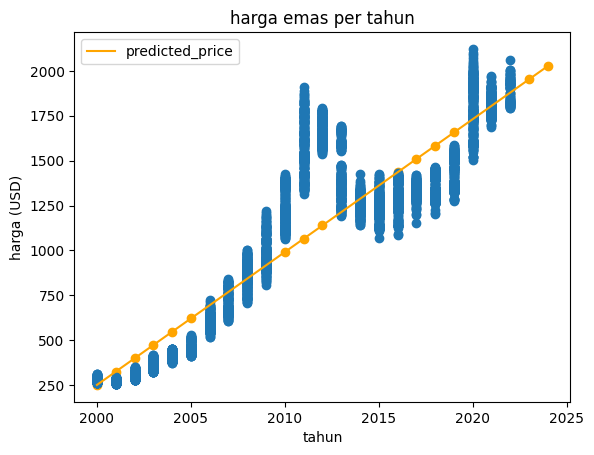

In [ ]:

# plot prediksi kita dari model
df_predicted_goldprice.set_index("year").plot(color="orange")
plt.scatter(data=df_predicted_goldprice, x="year", y="predicted_price", color="orange")

# plot data
plt.scatter(data=df_goldyear, x="tahun", y="price")

# percantik
plt.xlabel("tahun")
plt.ylabel("harga (USD)")
plt.title("harga emas per tahun")
plt.show()

garis lurus itu menunjukkan model Linear Regression kita, dan tidak punya limit. untuk tahun berapapun, tahun 100, tahun 35000, dia bisa prediksi harga emasnya. karena sudah berbentuk formula matematik.

kita yang perlu limit, kapan model ini valid.

In [ ]:
# 4. Evaluasi
model_emas.score(X, Y)

0.8329716031115436

In [ ]:
# 5. Tuning
# untuk model tipe linear regression, tidak ada yang kita tuning secara parameter modelnya
# mungkin kita bisa balik ke step preparasi data atau lainnya sebelum melatih ulang model

# Polynomial Regression
mirip Linear Regression

bedanya, formula matematik yang digunakan bersifat polynomial, yang ada kuadrat2nya. `Y = aX + bX^2 + c` contohnya untuk degree 2, ada kuadrat. untuk degree 3, ada kubik. untuk degree 1, sama saja dengan Linear Regression.

untuk contoh polynomial regression, kita bisa gunakan data harga emas yang sama seperti diatas


In [ ]:
# data kita tadi
X = df_goldyear[["tahun"]] # fitur, harus 2 dimensi
Y = df_goldyear['price']   # target, 1 dimensi saja

display(X.head())
display(Y[:5])

,tahun
0,2000
1,2000
2,2000
3,2000
4,2000


0    281.0
1    283.2
2    281.4
3    281.9
4    281.7
Name: price, dtype: float64

In [ ]:
# kita ubah format data menjadi versi polynomial
# misalnya degree 2
d = 2

transformer = PolynomialFeatures(degree=d, include_bias=False)

# data fitur kita diubah jadi versi polynomial
transformer.fit(X)
X_poly = transformer.transform(X)

X_poly[:5]

array([[2.e+03, 4.e+06],
       [2.e+03, 4.e+06],
       [2.e+03, 4.e+06],
       [2.e+03, 4.e+06],
       [2.e+03, 4.e+06]])

In [ ]:
# kita gunakan data versi polynomial untuk melatih model
model_emas_poly = LinearRegression()
model_emas_poly.fit(X_poly, Y)

LinearRegression()

### model polynomial regression sudah selesai dilatih
- kita bisa pakai untuk prediksi
- kita bisa evaluasi
- optional: karena 2 dimensi, 1 fitur, 1 target, kita bisa visualisasikan

In [ ]:
# kita bisa pakai untuk prediksi
# contoh, kalau di tahun 2024, harga emas berapa?
data_tahun_prediksi = [[2024]]
data_tahun_prediksi_poly = transformer.transform(data_tahun_prediksi)
print(data_tahun_prediksi_poly)

print()
model_emas_poly.predict(data_tahun_prediksi_poly)

[[2.024000e+03 4.096576e+06]]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([1755.70419227])

model polynomial kita, yang degree 2, memprediksi kalau harga emas adalah 1755.7 USD di tahun 2024

In [ ]:
# evaluasi model
model_emas_poly.score(X_poly, Y)

0.8533496915995288

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


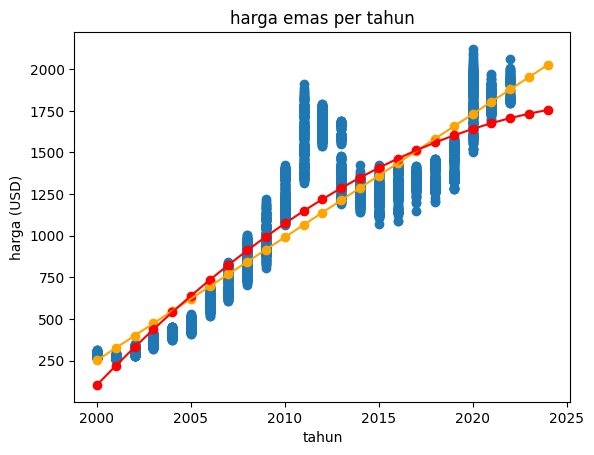

In [ ]:
# optional, visualisasi

# plot data awal
plt.scatter(data=df_goldyear, x="tahun", y="price")

# model kita kalau di tahun 2000 - 2024, memprediksi harga emas berapa?
# kita cari tau dulu model kita tiap tahunnya prediksi harga berapa, baru kt plot

# plot prediksi kita dari model Linear
years = np.arange(2000, 2025).reshape(-1,1)
prices = model_emas.predict(years) # model Linear Regression hasil prediksi

df_predicted_goldprice = pd.DataFrame({"year":years.reshape(-1), "predicted_price_linear":prices})

plt.scatter(data=df_predicted_goldprice, x="year", y="predicted_price_linear", color="orange")

df_predicted_goldprice = df_predicted_goldprice.set_index("year")

plt.plot(df_predicted_goldprice, color="orange")


# plot prediksi kita dari model Polynomial
years_poly = transformer.transform(years)
prices_poly = model_emas_poly.predict(years_poly)

df_predicted_goldprice_poly = pd.DataFrame({"year":years.reshape(-1), "predicted_price_poly":prices_poly})

plt.scatter(data=df_predicted_goldprice_poly, x="year", y="predicted_price_poly", color="red")

df_predicted_goldprice_poly = df_predicted_goldprice_poly.set_index("year")

plt.plot(df_predicted_goldprice_poly, color="red")


# percantik
plt.xlabel("tahun")
plt.ylabel("harga (USD)")
plt.title("harga emas per tahun")
plt.show()

dari visualisasi diatas, kita bisa lihat:
- biru, data kita
- oranye, model Linear Regression
- merah, model Polynomial Regression degree 2

model kita memprediksi value y-axis (target, harga emas) dengan menggunakan fitur x-axis (fitur kita cuma 1, tahun)

0.8533872582463136


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


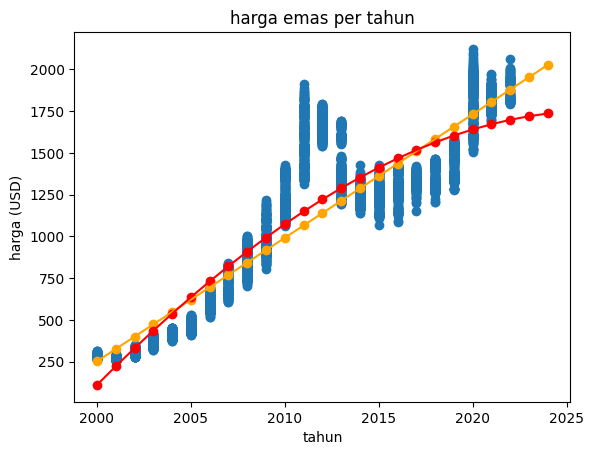

In [ ]:
# kita ubah format data menjadi versi polynomial
d = 3

transformer = PolynomialFeatures(degree=d, include_bias=False)
transformer.fit(X)
X_poly = transformer.transform(X)

model_emas_poly = LinearRegression()
model_emas_poly.fit(X_poly, Y)

# skor
print(model_emas_poly.score(X_poly, Y))

# visualisasi
plt.scatter(data=df_goldyear, x="tahun", y="price")

years = np.arange(2000, 2025).reshape(-1,1)
prices = model_emas.predict(years) # model Linear Regression hasil prediksi

df_predicted_goldprice = pd.DataFrame({"year":years.reshape(-1), "predicted_price_linear":prices})
plt.scatter(data=df_predicted_goldprice, x="year", y="predicted_price_linear", color="orange")
df_predicted_goldprice = df_predicted_goldprice.set_index("year")
plt.plot(df_predicted_goldprice, color="orange")

years_poly = transformer.transform(years)
prices_poly = model_emas_poly.predict(years_poly) # model Polynomial Regression hasil prediksi

df_predicted_goldprice_poly = pd.DataFrame({"year":years.reshape(-1), "predicted_price_poly":prices_poly})
plt.scatter(data=df_predicted_goldprice_poly, x="year", y="predicted_price_poly", color="red")
df_predicted_goldprice_poly = df_predicted_goldprice_poly.set_index("year")
plt.plot(df_predicted_goldprice_poly, color="red")

# percantik
plt.xlabel("tahun")
plt.ylabel("harga (USD)")
plt.title("harga emas per tahun")
plt.show()

untuk mengetahui model kita underfit/ overfit

kita bisa gunakan teknik data splitting

1. kita pisahkan data awal jadi 2 set: 80% data di set_A_training. 20% data di set_B_testing
2. kita latih model menggunakan data set_A_training
3. kita evaluasi skor model menggunakan data training dan data testing.
- kalau skornya mirip, model ok, tidak menghapal data. melihat data yang baru, tetap bisa dapat skor R2 yang tinggi.
- kalau skor data training lebih tinggi dari data testing, model sepertinya overfit. prediksi data dari data yang digunakan untuk latihan bagus, tapi untuk data yang pertama kali lihat, tidak bagus.

untuk skor R2 rendah, tapi setelah tuning skor membaik (tanpa overfit), berarti awalnya model underfit.

## Model Regression with Multiple Features
saat fitur lebih dari satu, kita tetap bisa membuat model tipe Regression

In [ ]:
# dummy data
luas_tanah = np.arange(10,100,10)
luas_bangunan = np.array([10, 15, 15, 20, 50, 30, 35, 100, 180])
harga = np.array([100,120,150,170,190,180,200,250,500])

df_tanah = pd.DataFrame({"tanah":luas_tanah, "bangunan":luas_bangunan, "harga":harga})
df_tanah

,tanah,bangunan,harga
0,10,10,100
1,20,15,120
2,30,15,150
3,40,20,170
4,50,50,190
5,60,30,180
6,70,35,200
7,80,100,250
8,90,180,500


In [ ]:
# untuk prediksi harga dari tanah dan bangunan
X = df_tanah[["tanah", "bangunan"]] # fitur 2 kolom, 2 dimensi
Y = df_tanah["harga"] # target 1 dimensi

# model linear regression
model = LinearRegression()
model.fit(X, Y)

# evaluasi
print("skor:", model.score(X, Y))

# dipakai untuk buat prediksi, misalnya kalau tanah 100 meter, bangunan 20 meter, harga berapa?
# dipakai untuk buat prediksi, misalnya kalau tanah 1200 meter, bangunan 300 meter, harga berapa?
df_pred = pd.DataFrame({"tanah":[100, 1200], "bangunan":[20, 300]})
# display(df_pred)

hasil_prediksi = model.predict(df_pred)
df_pred["prediksi harga"] = hasil_prediksi

display(df_pred)

skor: 0.9406174694219891


,tanah,bangunan,prediksi harga
0,100,20,166.139681
1,1200,300,1096.559576
